## Affichage et calcul des lignes de courant de l'eau souterraine

Cet exemple de notebook permet de comprendre comment fonctionne le calcul des lignes de courants à partir des données de charges hydrauliques calculés par le programme ZuPer. Ce dernier utilise le logiciel Feflow pour définir ces charges hydraulique du modèle après avoir résolution l'équation de continuité sur Feflow.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import ifm as ifm

class zuper:

    doc = ''
    
    #####################
    # Instance variable #
    #####################
    
    def __init__(self, url_file):
        
        #get feflow file
        self.doc = ifm.loadDocument(url_file)

        print("Object created !")

data = zuper(r'C:\zuper\test.fem')

global h, x, y, k_mean, xmin, xmax, ymin, ymax, dict_results

doc = data.doc
nnodes = doc.getNumberOfNodes()
nelements = doc.getNumberOfElements()
x, y = np.zeros((nnodes,)), np.zeros((nnodes,))
for i in range(nnodes):
    x[i] = doc.getX(i)
    y[i] = doc.getY(i)

xmin, xmax, ymin, ymax = np.min(x), np.max(x), np.min(y), np.max(y)
dx = x[1] - x[0]
nbx_nd = int(np.round( (xmax - xmin)/dx )) + 1
dy = y[0] - y[nbx_nd]
nby_nd = int(np.round( (ymax - ymin)/dy )) + 1

k_mean=1e-3
dict_results = {'charge':np.zeros(nnodes)}

for i in range(nnodes):
    dict_results['charge'][i] = doc.getResultsFlowHeadValue(i)

dict_results['charge'].shape = (nby_nd, nbx_nd)

Object created !


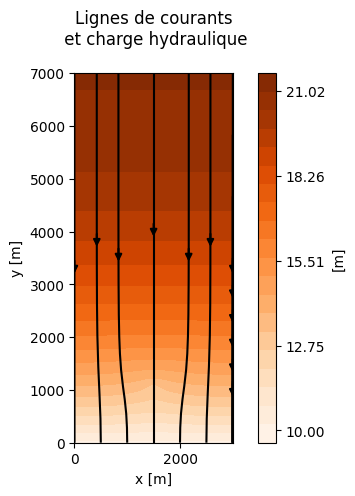

In [18]:
def currentLines():    
    h = dict_results['charge']
    x.shape = (nby_nd, nbx_nd)
    y.shape = (nby_nd, nbx_nd)
    h.shape = (nby_nd, nbx_nd)
    
    # define a mesh to calculate current liens
    xnew, ynew = np.linspace(xmin, xmax, nbx_nd), np.linspace(ymin, ymax, nby_nd)
    xx,yy = np.meshgrid(xnew,ynew)
    
    # calculate hydraulic gradient and velocities in x-axis and y-axis
    dhy,dhx=np.gradient(h[::-1])
    ux=-k_mean*dhx
    uy=-k_mean*dhy
    
    # initiate shape of mesh
    xx.shape = (nby_nd, nbx_nd)
    yy.shape = (nby_nd, nbx_nd)
    
    # plot the graph of current lines with hydraulic head
    pc = plt.contourf(x, y, h, cmap='Oranges', levels=20)
    plt.streamplot(xx,yy,ux,uy,0.24, color='black', broken_streamlines=False)
    cbar = plt.colorbar(pc, ticks=np.linspace(np.min(h),np.max(h),5))
    cbar.set_label('[m]')
    plt.axis([xmin, xmax, ymin, ymax])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("x [m]")
    plt.ylabel("y [m]")
    plt.title('Lignes de courants\n et charge hydraulique\n')
    plt.show()

currentLines()